# 1. Работа с таблицей

## 1.1 Чтение таблицы

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
table_hgnc = pd.read_csv('hgnc_complete_set/hgnc_complete_set.tsv', sep = '\t', low_memory=False)
table_hgnc.head()

,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,...,merops,imgt,iuphar,kznf_gene_catalog,mamit-trnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_ids
0,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,NaN,...,I43.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00007E4F6E
2,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q11.23,10q11.23,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,NaN,...,I39.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00001F234A


## 1.2 Построение графика

<Axes: >

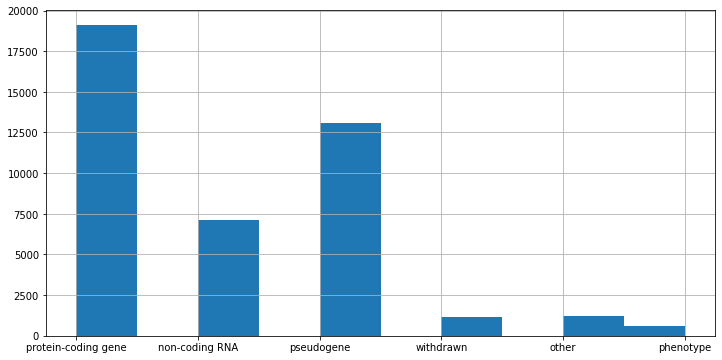

In [3]:
plt.figure()
table_hgnc['locus_group'].hist(figsize = (12,6))

# 2. Картинка

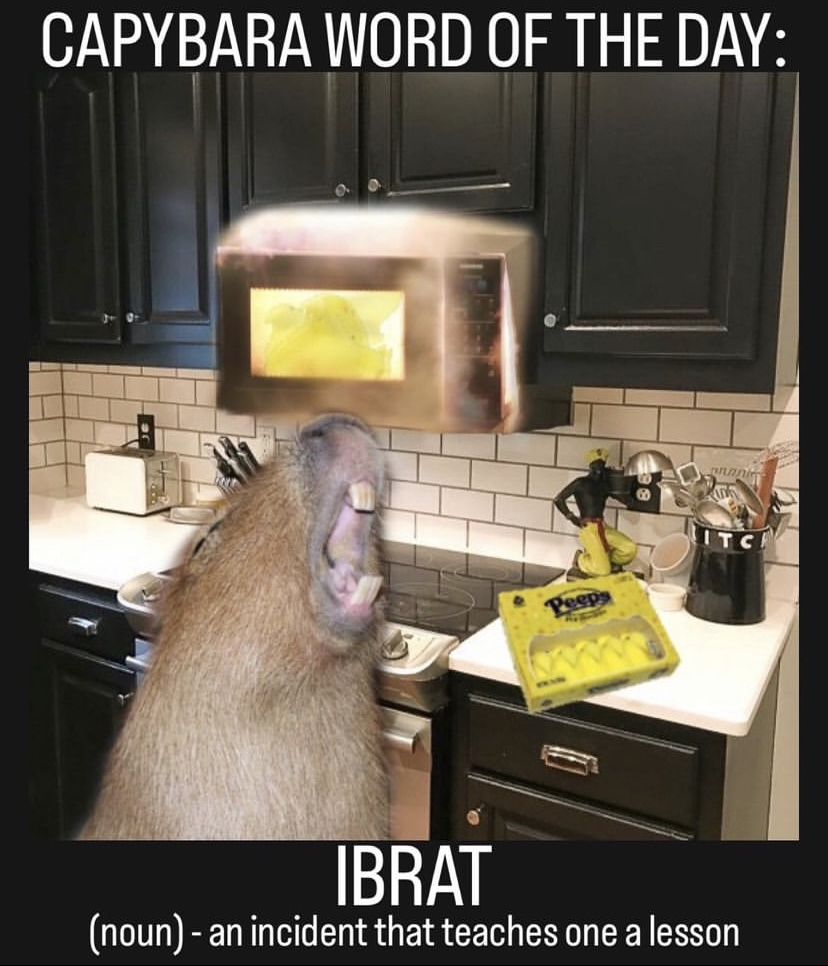

# Задача 3*

In [4]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


С лекции:

In [5]:
%load_ext rpy2.ipython

Пользовалась этим сайтом для прочтения таблицы pandas в R: https://pandas.pydata.org/pandas-docs/version/0.22/r_interface.html

In [6]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

pandas2ri.py2ri понадобится, чтобы конвертировать pandas DataFrame в R.

In [47]:
%%R 
install.packages("ggplot2")

* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/mtresheva/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/octet-stream' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/RtmpwjuiVQ/downloaded_packages’


In [21]:
%%R 
library(ggplot2)

In [54]:
import rpy2.robjects

Сначала не работало с модулем .py2ri, но оказалось, .py2rpy работает https://github.com/rpy2/rpy2/issues/756

В строке ниже сначала выдавал ошибку, что не может прочитать данные разных типов, возможно из-за NaN'ов, поэтому делаем все типа str:

In [41]:
table_hgnc = table_hgnc.astype(str)

In [42]:
r_data = pandas2ri.py2rpy(table_hgnc)

In [44]:
from rpy2.robjects import globalenv

In [43]:
globalenv['r_data'] = r_data

Тут написано, как красиво разукрасить: https://r-graph-gallery.com/218-basic-barplots-with-ggplot2.html

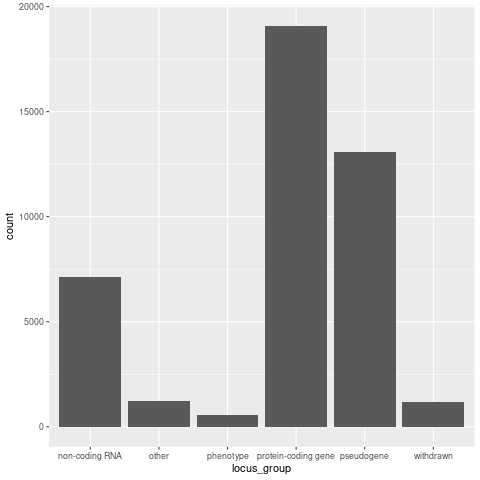

In [57]:
%%R
ggplot(r_data, aes(x = locus_group)) + geom_bar(stat = "count")

Победа!!! Я никогда так не радовалась серому бар-плоту.

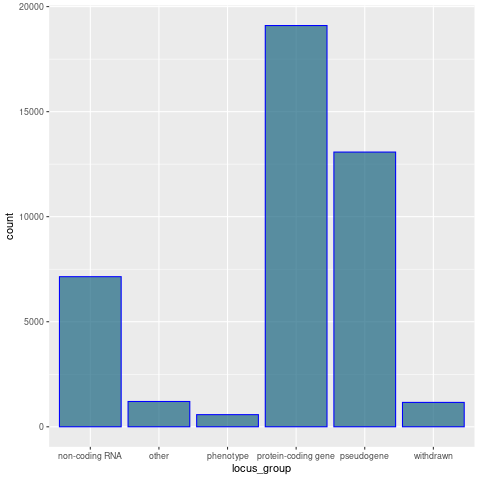

In [55]:
%%R
ggplot(r_data, aes(x = locus_group)) + geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7) )

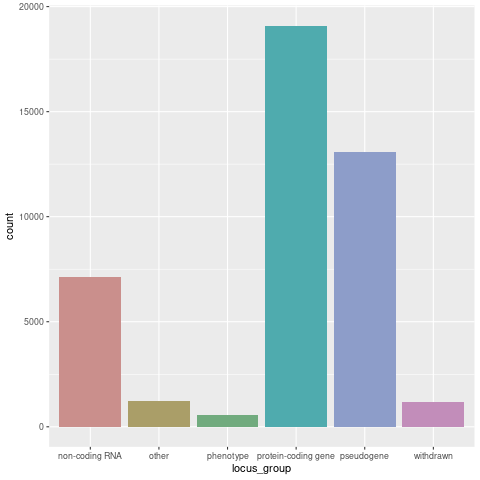

In [52]:
%%R
ggplot(r_data, aes(x = locus_group, fill = locus_group)) + geom_bar() + scale_fill_hue(c = 40) + theme(legend.position="none")

Можно не убирать легенду, она продублирует подписи под осями, но зато оси можно повернуть на 45 градусов!

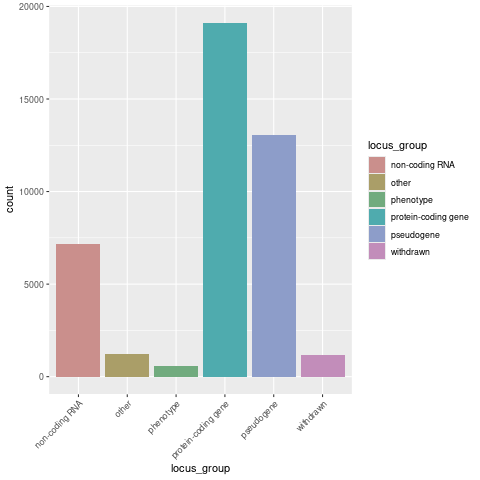

In [64]:
%%R
ggplot(r_data, aes(x = locus_group, fill = locus_group)) + geom_bar() + scale_fill_hue(c = 40) + theme(axis.text.x = element_text(angle = 45, hjust = 1))